In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Data Cleaning

- Load the dataset using pandas.
- Handle missing values and clean the data appropriately.
- Convert data types if necessary (e.g., converting strings to numerical values).

####  Load the dataset using pandas.

In [31]:
pwd = os.getcwd()
data_dir = os.path.join(pwd,'datasets')
files = os.listdir(data_dir)
dfs = []

for file in files:
    if file.endswith('.csv'):
        if file.endswith('_small.csv'): continue
        path=str.replace(os.path.join(data_dir,file), "\\", "/")
        df = pd.read_csv(path,low_memory=False)
        dfs.append(df)

#### Handle missing values and clean the data appropriately.

In [32]:
for df in dfs:
    df.fillna(-1, inplace=True)
dfs

[                                                    cast  \
 0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
 1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
 2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
 3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
 4      [{'cast_id': 1, 'character': 'George Banks', '...   
 ...                                                  ...   
 45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
 45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
 45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
 45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
 45475                                                 []   
 
                                                     crew      id  
 0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
 1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
 2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15

#### Convert data types if necessary 

In [33]:
meta_df = dfs[-2]
rating_df = dfs[-1]

In [34]:
# 可以发现df4中全是object，我们需要将其中一些列转化为可数值。
# 一些true or false 需要转化为bool

for i,df in enumerate(dfs):
    types = ''
    for col in df.columns:
        types += str(df[col].dtype) + ' '
    print(f"dataframe {i+1}:",types)
    
tf_columns = ['adult','video']
columns = ['id','budget','popularity','revenue','runtime','vote_average','vote_count']
for col in columns:
    meta_df[col] = pd.to_numeric(meta_df[col], errors='coerce')
for col in tf_columns:
     meta_df['adult'].replace({"False": 0, "True": 1}, inplace=True)

meta_df['imdb_id'] = meta_df['imdb_id'].str.replace('tt', '')
meta_df['release_date'] = pd.to_datetime(meta_df['release_date'], errors='coerce')

print("Transformed:")
for i,df in enumerate(dfs):
    types = ''
    for col in df.columns:
        types += str(df[col].dtype) + ' '
    print(f"dataframe {i+1}:",types)

dataframe 1: object object int64 
dataframe 2: int64 object 
dataframe 3: int64 int64 float64 
dataframe 4: object object object object object object object object object object object object object object object float64 float64 object object object object object float64 float64 
dataframe 5: int64 int64 float64 int64 
Transformed:
dataframe 1: object object int64 
dataframe 2: int64 object 
dataframe 3: int64 int64 float64 
dataframe 4: object object float64 object object float64 object object object object float64 object object object datetime64[ns] float64 float64 object object object object object float64 float64 
dataframe 5: int64 int64 float64 int64 


### Exploratory Data Analysis
- Generate summary statistics for the numerical columns.
- Explore the distribution of movie ratings and revenues.
- Identify the top 10 highest-grossing movies.

#### Generate summary statistics for the numerical columns.
```python
statics_df = pd.merge(meta_df,dfs[-1], left_on='id', right_on='movieId',how='left')
```

In [35]:
colomns = ['adult','revenue','runtime','popularity','vote_average','vote_count','budget']

df_d0 = pd.DataFrame(meta_df[colomns].describe())
df_d1 = dfs[-1]['rating'].describe()
df_d0['rating'] = df_d1
df_d0

,revenue,runtime,popularity,vote_average,vote_count,budget,rating
count,4.546600e+04,45466.000000,45465.000000,45466.000000,45466.000000,4.546300e+04,2.602429e+07
mean,1.120787e+07,93.577926,2.921047,5.617334,109.882704,4.224579e+06,3.528090e+00
std,6.432813e+07,38.970135,6.005225,1.925590,491.279605,1.742413e+07,1.065443e+00
min,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,5.000000e-01
25%,0.000000e+00,85.000000,0.385825,5.000000,3.000000,0.000000e+00,3.000000e+00
50%,0.000000e+00,95.000000,1.127443,6.000000,10.000000,0.000000e+00,3.500000e+00
75%,0.000000e+00,107.000000,3.678394,6.800000,34.000000,0.000000e+00,4.000000e+00
max,2.787965e+09,1256.000000,547.488298,10.000000,14075.000000,3.800000e+08,5.000000e+00


#### Explore the distribution of movie ratings and revenues.

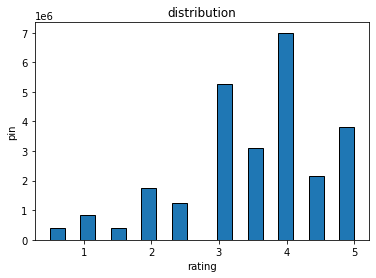

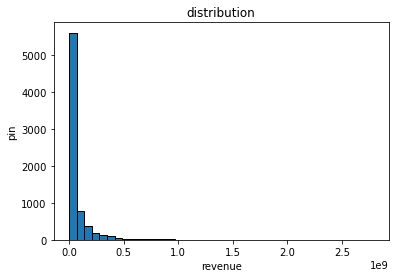

In [97]:
plt.figure()
plt.hist(dfs[-1]['rating'].dropna(), bins=20, edgecolor='black')
plt.title('distribution')
plt.xlabel('rating')
plt.ylabel('pin')
plt.show()

filtered_data = meta_df[meta_df['revenue'] != 0]['revenue']

plt.figure()
plt.hist(filtered_data.dropna(), bins=40, edgecolor='black')
plt.title('distribution')
plt.xlabel('revenue')
plt.ylabel('pin')
plt.show()

#### Identify the top 10 highest-grossing movies.

In [37]:
top10_highest_grossing = meta_df.nlargest(10, 'revenue')[['title', 'revenue']]
top10_highest_grossing

,title,revenue
14551,Avatar,2.787965e+09
26555,Star Wars: The Force Awakens,2.068224e+09
1639,Titanic,1.845034e+09
17818,The Avengers,1.519558e+09
25084,Jurassic World,1.513529e+09
28830,Furious 7,1.506249e+09
26558,Avengers: Age of Ultron,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09
22110,Frozen,1.274219e+09
42222,Beauty and the Beast,1.262886e+09


In [38]:
# count word frequency

keyword_df = dfs[1].dropna()

all_keywords = pd.Series([keyword["name"] for sublist in keyword_df["keywords"].apply(eval) for keyword in sublist])

word_frequency = all_keywords.value_counts().reset_index()
word_frequency.columns = ["name", "frequence"]

word_frequency

,name,frequence
0,woman director,3115
1,independent film,1930
2,murder,1308
3,based on novel,835
4,musical,734
...,...,...
19951,longest film,1
19952,figher airplane,1
19953,all girl,1
19954,ancient scroll,1


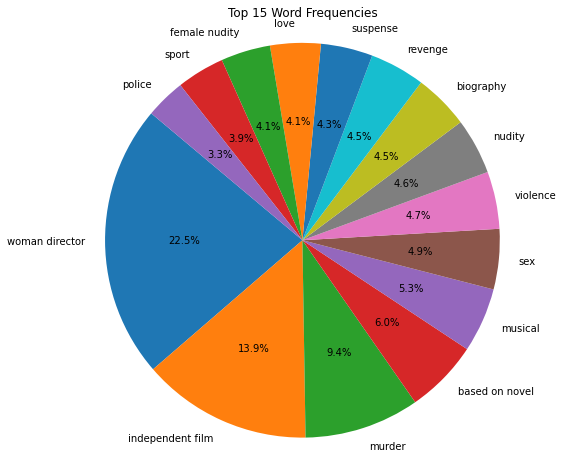

In [63]:
top10_highes_word_frequence=word_frequency.sort_values(by="frequence", ascending=False).head(15)
plt.figure(figsize=(10, 8))
plt.pie(top10_highes_word_frequence['frequence'], labels=top10_highes_word_frequence["name"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Top 15 Word Frequencies')
plt.show()

### Genre Analysis
- Create a new column that lists the genre of each movie.
- Determine the most common movie genre.
- Analyze the average rating by genre.

#### Create a new column that lists the genre of each movie.

In [ ]:
meta_df["genres"] = meta_df["genres"].apply(lambda x: eval(x))

In [39]:
meta_df['genres'] = meta_df['genres'].apply(lambda x: [{'name':'unknown'}] if x == [] else x)

genres_expanded = np.concatenate(meta_df['genres'])
title_expanded = np.repeat(meta_df['title'], [len(genre) for genre in meta_df['genres']])
id_expanded = np.repeat(meta_df['id'], [len(genre) for genre in meta_df['genres']])

new_df = pd.DataFrame({'movieId': id_expanded, 'title': title_expanded, 'genre': genres_expanded})

new_df['genre'] = new_df["genre"].apply(lambda row: row["name"])
genres_df=new_df.reset_index()
genres_df=genres_df.drop(columns="index")
genres_df

,movieId,title,genre
0,862.0,Toy Story,Animation
1,862.0,Toy Story,Comedy
2,862.0,Toy Story,Family
3,8844.0,Jumanji,Adventure
4,8844.0,Jumanji,Fantasy
...,...,...,...
93543,67758.0,Betrayal,Action
93544,67758.0,Betrayal,Drama
93545,67758.0,Betrayal,Thriller
93546,227506.0,Satan Triumphant,unknown


#### Determine the most common movie genre.

In [24]:
counts = genres_df['genre'].value_counts()
print('Most common movie genre:',counts.idxmax())
print('Times:',counts.max())

Most common movie genre: Drama
Times: 20265


#### Analyze the average rating by genre.

In [48]:
genre_avg_df = pd.merge(genres_df,rating_df,on='movieId',how='right') 
avg_rating = pd.DataFrame(genre_avg_df.groupby('genre')['rating'].mean())

In [82]:
avg_rating

,rating
genre,
Action,3.558277
Adventure,3.503404
Animation,3.597373
Comedy,3.536900
Crime,3.572401
Documentary,3.485778
Drama,3.535949
Family,3.396431
Fantasy,3.507117


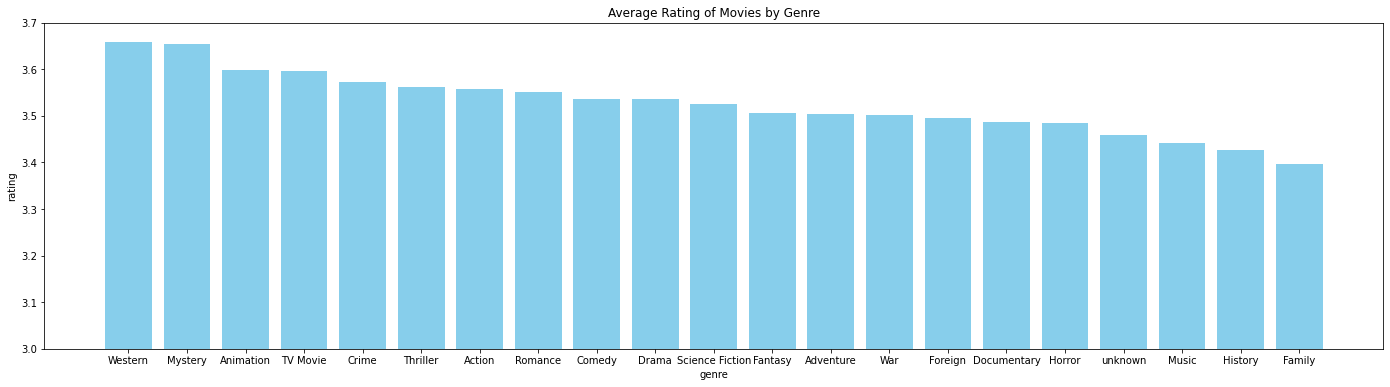

In [93]:
sorted_avg_rating=avg_rating.sort_values(by="rating", ascending=False)
plt.figure(figsize=(24, 6))
plt.bar(sorted_avg_rating.index, sorted_avg_rating["rating"], color='skyblue')
plt.ylim(3, 3.7)
plt.title('Average Rating of Movies by Genre')
plt.xlabel("genre")
plt.ylabel("rating")
plt.show()

### Temporal Trends 
- Examine how the number of movies released has changed over time. 
- Investigate trends in movie revenues over the years

#### Examine how the number of movies released has changed over time.

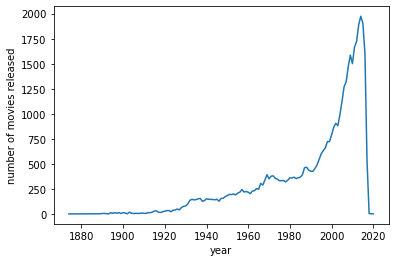

In [26]:
year_df = meta_df
year_df['release_date'] = pd.to_datetime(meta_df['release_date']).dt.year
year_counts = year_df.groupby('release_date').size()
plt.plot(year_counts)
plt.xlabel('year')
plt.ylabel('number of movies released')
plt.show()

#### 4.2 Investigate trends in movie revenues over the years

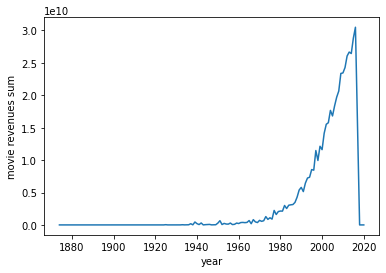

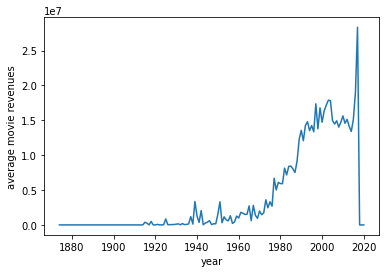

In [27]:
year_rev_df = year_df.groupby('release_date')['revenue']

plt.plot(year_rev_df.sum())
plt.xlabel('year')
plt.ylabel('movie revenues sum')
plt.show()

plt.plot(year_rev_df.mean())
plt.xlabel('year')
plt.ylabel('average movie revenues')
plt.show()

### 5. Basic Calculations :
- Calculate the average revenue of movies for each year.
- Determine the average movie rating for each genre.

#### 5.1 Calculate the average revenue of movies for each year.

In [28]:
pd.DataFrame(year_rev_df.mean())

,revenue
release_date,
1874.0,0.000000e+00
1878.0,0.000000e+00
1883.0,0.000000e+00
1887.0,0.000000e+00
1888.0,0.000000e+00
...,...
2015.0,1.512827e+07
2016.0,1.901364e+07
2017.0,2.833815e+07


#### 5.2 Determine the average movie rating for each genre

In [29]:
pd.DataFrame(avg_rating)

,rating
genre,
Action,3.558277
Adventure,3.503404
Animation,3.597373
Comedy,3.536900
Crime,3.572401
Documentary,3.485778
Drama,3.535949
Family,3.396431
Fantasy,3.507117


### Insights and Conclusion:
- Summarize your key findings from the EDA and Genre Analysis.
- Discuss any interesting trends observed in the Temporal Trends section.

1. Through analyzing the distribution of movie rating and revenues, we found that most movie ratings are between 3 and 4, while most movie revenue are less than 70 millions.
2. The top 10 movies with most revenues are Avatar, Star Wars: Force Awakens,Titanic, The Avengers, Jurassic World, Furious 7, Avengers: Age of Ultron, Harry Potter and the Deathly Hallows: Part 2, Frozen and Beauty and the Beast.
3. The top 10 most frequent keywords of movie are "woman director", "independent film", "murder", "based on novel", "musical", "sex", "violence", "nudity", and so on.
4. The most common movie genre is drama
5. Dispite there are different movie genres, the average rating of them are almost the same. The top 5 genres with the highest rating are western, mystery, animation, TV movies and crime.
6. The numbers of released movies were getting more and more until 2020. Owing to the impact of pandemic, there are almost no movie in 2020. Additionally, the numbers of released movies grew dramatically from 1980 until 2020.
7. The average movie revenues increased rapidly between 1980 and 2000, then the revenues went up and down, and peaked around 2018.